<a href="https://colab.research.google.com/github/KenDaupsey/Non-Parametric-Survival-Analysis-Kaplan-Meier-Estimator/blob/main/Non_Parametric_Survival_Analysis~1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Non-Parametric Survival Analysis 1 ***

*** Kaplan Meier Estimator ***

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
### Load Dataset
url= "https://raw.githubusercontent.com/KenDaupsey/Non-Parametric-Survival-Analysis-Kaplan-Meier-Estimator/main/Survival%7EDrug%7EUse%7ERelapse.csv"
df= pd.read_csv (url)
df.head()

,ID,age,ndrugtx,treat,site,time,censor,herco
0,1,39.0,1.0,1,0,188,1,3
1,2,33.0,8.0,1,0,26,1,3
2,3,33.0,3.0,1,0,207,1,2
3,4,32.0,1.0,0,0,144,1,3
4,5,24.0,5.0,1,0,551,0,2


In [46]:
df.columns

Index(['ID', 'age', 'ndrugtx', 'treat', 'site', 'time', 'censor', 'herco'], dtype='object')

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       628 non-null    int64  
 1   age      623 non-null    float64
 2   ndrugtx  611 non-null    float64
 3   treat    628 non-null    int64  
 4   site     628 non-null    int64  
 5   time     628 non-null    int64  
 6   censor   628 non-null    int64  
 7   herco    628 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 39.4 KB
None


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,628.0,314.500000,181.432265,1.0,157.75,314.5,471.25,628.0
age,623.0,32.369181,6.119534,20.0,27.00,32.0,37.00,56.0
ndrugtx,611.0,4.574468,5.494462,0.0,1.00,3.0,6.00,40.0
treat,628.0,0.490446,0.500307,0.0,0.00,0.0,1.00,1.0
site,628.0,0.292994,0.455498,0.0,0.00,0.0,1.00,1.0
time,628.0,234.703822,201.701126,2.0,79.00,166.0,365.25,1172.0
censor,628.0,0.808917,0.393468,0.0,1.00,1.0,1.00,1.0
herco,628.0,1.898089,0.899652,1.0,1.00,2.0,3.00,3.0


In [49]:
df.isnull().sum()

ID          0
age         5
ndrugtx    17
treat       0
site        0
time        0
censor      0
herco       0
dtype: int64

In [50]:
# Handle missing values of "ndrugtx"

df['ndrugtx'].fillna(df['ndrugtx'].median(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

In [51]:
df.isnull().sum()

ID         0
age        0
ndrugtx    0
treat      0
site       0
time       0
censor     0
herco      0
dtype: int64

In [52]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['ndrugtx'].dropna())
print(f'Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}')

Shapiro-Wilk Test: Statistics=0.708, p-value=0.000


In [53]:
!pip install lifelines

Shapiro-Wilk Test: Statistics=0.981, p-value=0.000


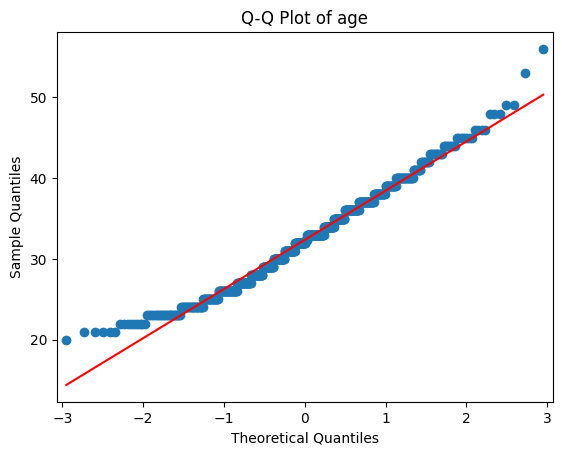

In [54]:
import statsmodels.api as sm
from scipy.stats import shapiro

# Shapiro-Wilk Test
stat, p_value = shapiro(df['age'].dropna())
print(f'Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}')

# Q-Q Plot
sm.qqplot(df['age'].dropna(), line='s')
plt.title('Q-Q Plot of age')
plt.show()

In [55]:
#!pip install lifelines

In [56]:
### Import Necessary Libraries for Kaplan Meier procedure
from lifelines import KaplanMeierFitter
from lifelines.utils import survival_table_from_events

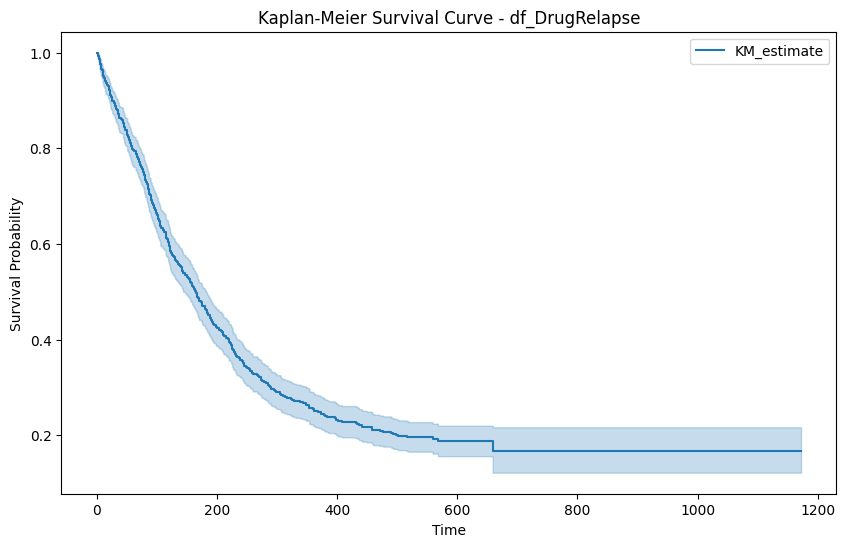

Median Survival Time: 166.0 units of time
Survival Probability at Time 50: 0.8359872611464968


In [57]:
# Kaplan-Meier Estimation
kmf = KaplanMeierFitter()

# Define time and event columns
time_col = 'time'
event_col = 'censor'

# Fit the Kaplan-Meier estimator
kmf.fit(durations=df[time_col], event_observed=df[event_col])

# Plot Kaplan-Meier Survival Curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve - df_DrugRelapse')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

# Additional Metrics
event_table = survival_table_from_events(df[time_col], df[event_col])
median_survival_time = kmf.median_survival_time_
survival_prob_at_time_50 = kmf.predict([50])  #  Access the first element of the array
print(f"Median Survival Time: {median_survival_time} units of time")
print(f"Survival Probability at Time 50: {survival_prob_at_time_50}")

*** Full Code for Kaplan Meier Estimator ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       628 non-null    int64  
 1   age      628 non-null    float64
 2   ndrugtx  628 non-null    float64
 3   treat    628 non-null    int64  
 4   site     628 non-null    int64  
 5   time     628 non-null    int64  
 6   censor   628 non-null    int64  
 7   herco    628 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 39.4 KB
None
               ID         age     ndrugtx       treat        site  \
count  628.000000  628.000000  628.000000  628.000000  628.000000   
mean   314.500000   32.369181    4.531847    0.490446    0.292994   
std    181.432265    6.095085    5.425494    0.500307    0.455498   
min      1.000000   20.000000    0.000000    0.000000    0.000000   
25%    157.750000   27.000000    1.000000    0.000000    0.000000   
50%    314.500000   32.000000    3.000000    0

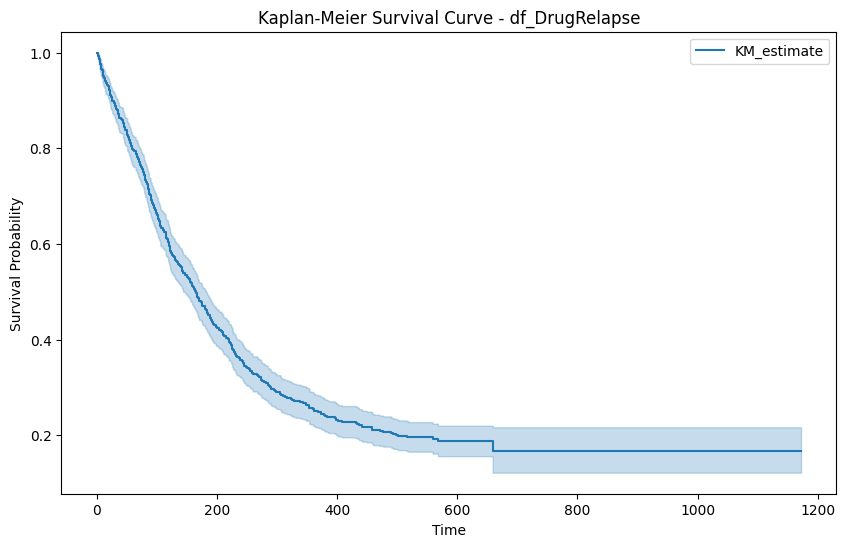

Median Survival Time: 166.0 units of time
Survival Probability at Time 50: 0.8359872611464968


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.utils import survival_table_from_events

# Load the df_DrugRelapse dataset
# Assuming you have already loaded the dataset

# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

# Handle missing values
df['ndrugtx'].fillna(df['ndrugtx'].median(), inplace=True)

# Kaplan-Meier Estimation
kmf = KaplanMeierFitter()

# Define time and event columns
time_col = 'time'
event_col = 'censor'

# Fit the Kaplan-Meier estimator
kmf.fit(durations=df[time_col], event_observed=df[event_col])

# Plot Kaplan-Meier Survival Curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve - df_DrugRelapse')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

# Additional Metrics
event_table = survival_table_from_events(df[time_col], df[event_col])
median_survival_time = kmf.median_survival_time_
survival_prob_at_time_50 = kmf.predict([50])  #  Access the first element of the array
print(f"Median Survival Time: {median_survival_time} units of time")
print(f"Survival Probability at Time 50: {survival_prob_at_time_50}")

*** The End ***